In [40]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.dummy import DummyRegressor
from sklearn.metrics import root_mean_squared_error


In [41]:
# Load and preprocess your data
df_train = pd.read_csv('nba_combined_1980_2015.csv')
df_test = pd.read_csv('nba_combined_2016_2024.csv')

# Filter players based on conditions MP > 12 and G > 15
df_train = df_train[(df_train['MP'] > 12) & (df_train['G'] > 15)]
df_test = df_test[(df_test['MP'] > 12) & (df_test['G'] > 15)]

# Assume you've already handled multiple teams and team matching

# Feature columns
features = ['G', 'MP', 'PTS', 'eFG%', 'TS%', 'AST', 'TRB', 'STL', 'BLK', 
            'TOV', 'EFF', 'MVP_count', 'MVP_nominations']
X_train = df_train[features]
X_test = df_test[features]

# Target variable
y_train = df_train['MVP']
y_test = df_test['MVP']


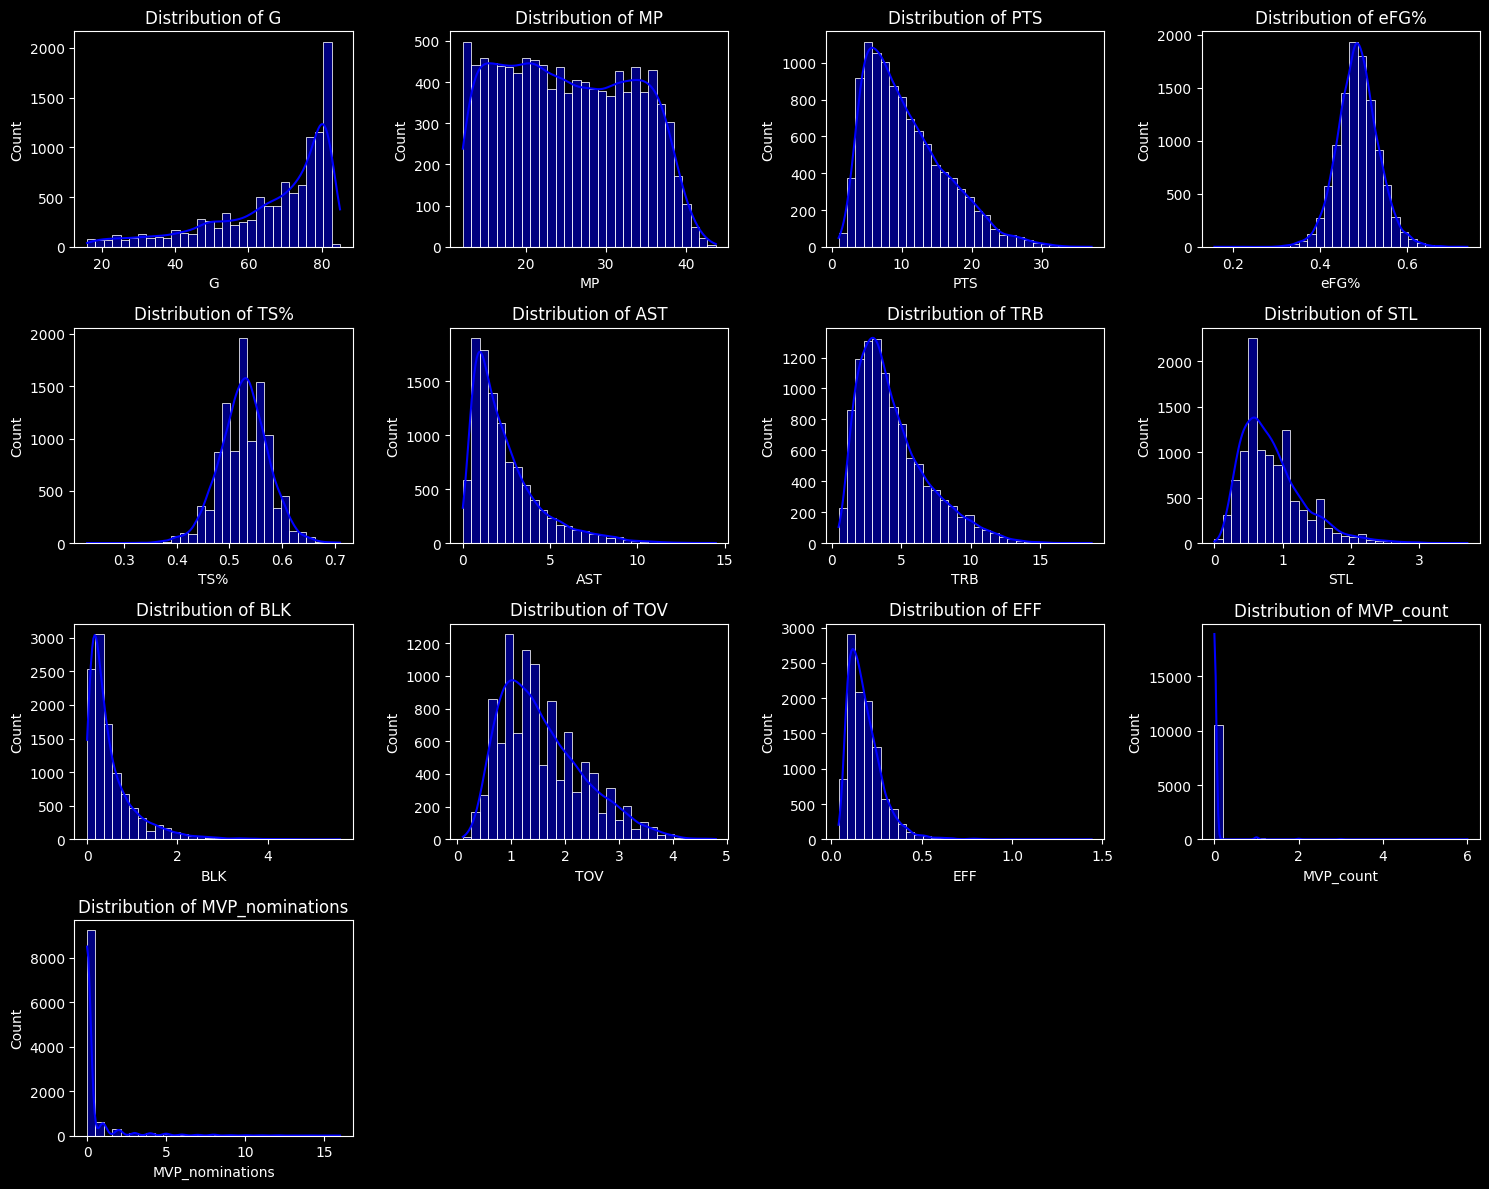

In [42]:
# ----- Visualization 1: Feature Distributions -----
plt.figure(figsize=(15, 12))  # Increase figure height for 11 plots
for i, col in enumerate(features):  # Plot all features
    plt.subplot(4, 4, i + 1)  # Arrange in 4 rows and 4 columns (16 total spaces)
    sns.histplot(df_train[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

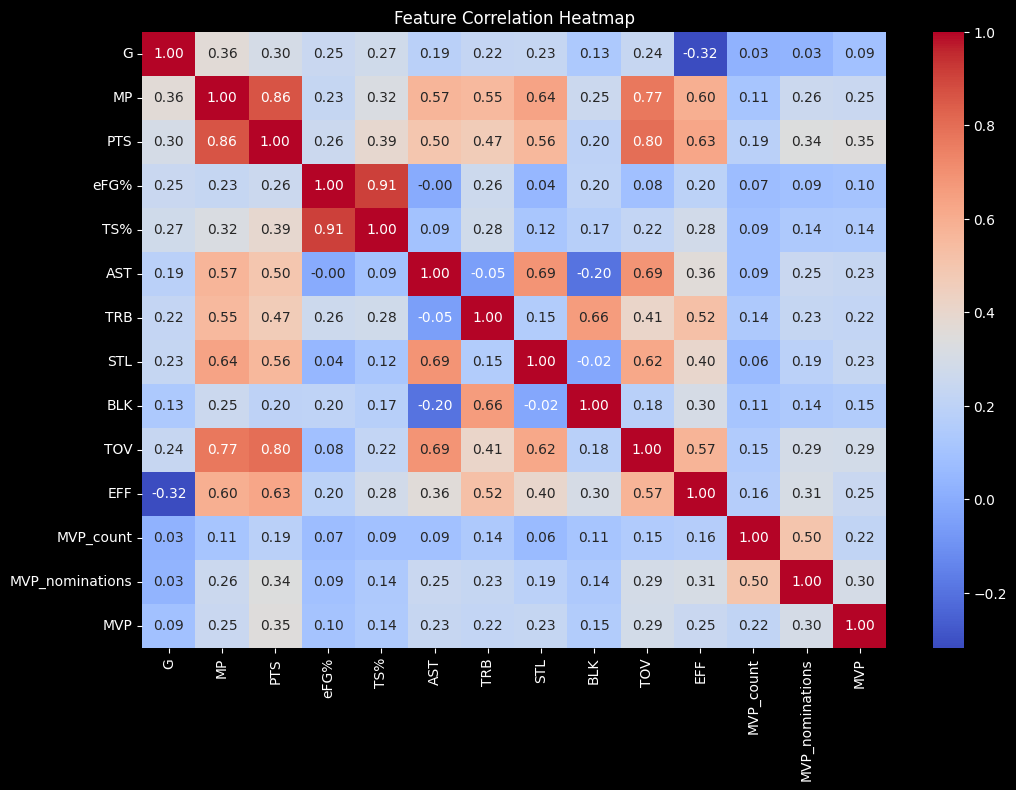

In [43]:
# ----- Visualization 2: Correlation Heatmap -----
# Calculate the correlation matrix for the selected features and target
correlation = df_train[features + ['MVP']].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Feature Correlation Heatmap')
plt.show()

/tmp/ipykernel_40070/252490669.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances, x='Importance', y='Feature', palette='viridis')


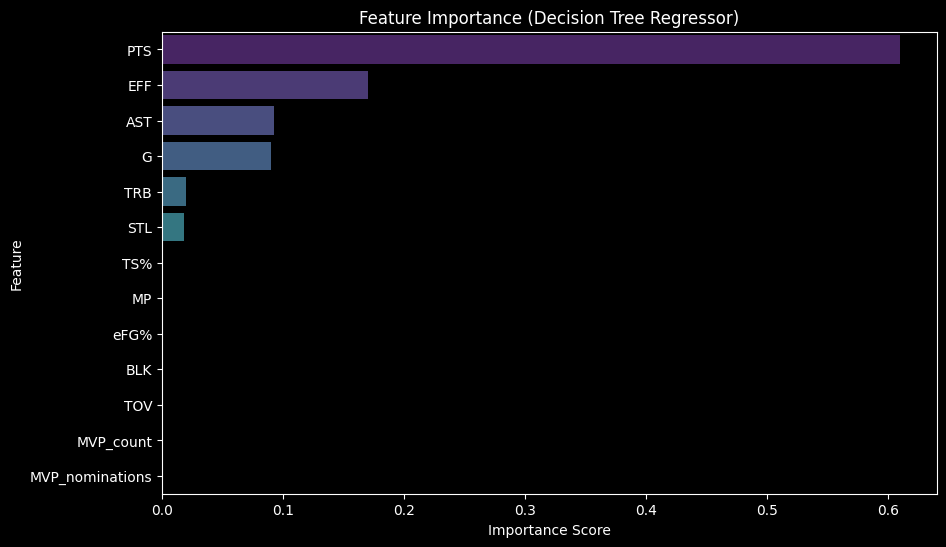

In [44]:
# ----- Visualization 3: Feature Importance -----
# Fit a simple Decision Tree Regressor to identify feature importance
from sklearn.tree import DecisionTreeRegressor

# Fit a Decision Tree Regressor model (for regression tasks like predicting MVP rank)
tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

# Feature importance plot
importances = pd.DataFrame({'Feature': features, 'Importance': tree_model.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (Decision Tree Regressor)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


/tmp/ipykernel_40070/2610582710.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x='MVP', y='MVP_count', palette='Set2')
/tmp/ipykernel_40070/2610582710.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x='MVP', y='MVP_nominations', palette='Set3')


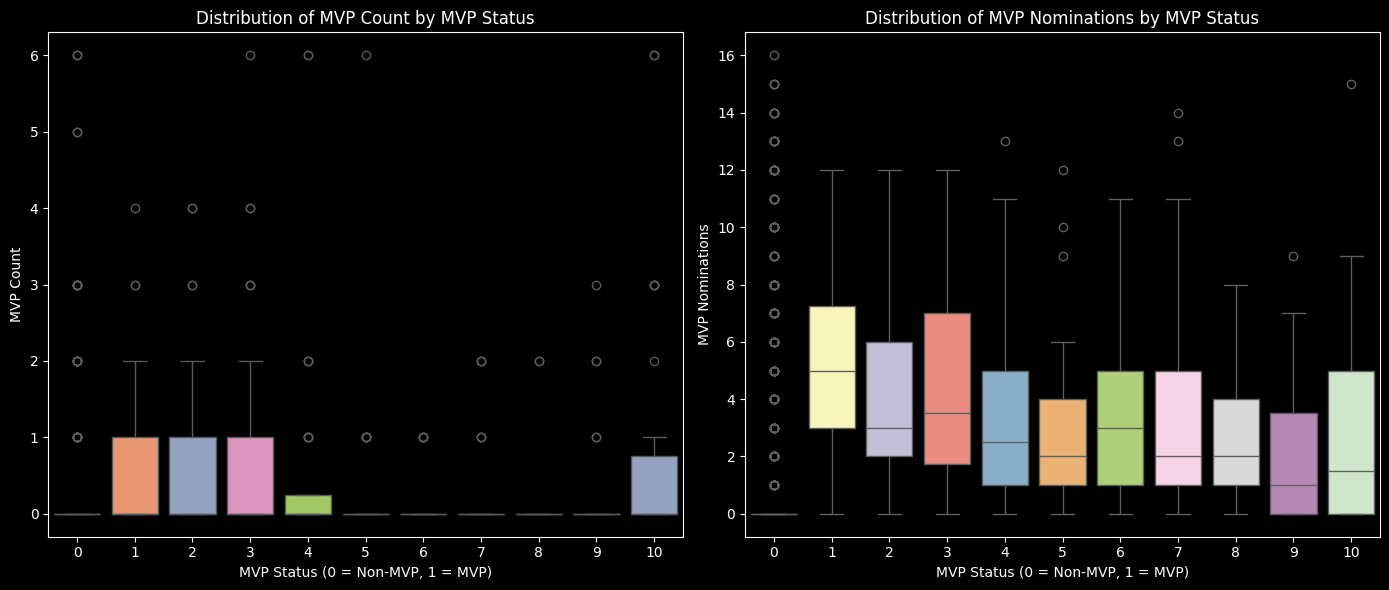

In [45]:
# ----- Visualization 4: MVP-Related Features -----
plt.figure(figsize=(14, 6))

# Boxplot for MVP Count
plt.subplot(1, 2, 1)
sns.boxplot(data=df_train, x='MVP', y='MVP_count', palette='Set2')
plt.title('Distribution of MVP Count by MVP Status')
plt.xlabel('MVP Status (0 = Non-MVP, 1 = MVP)')
plt.ylabel('MVP Count')

# Boxplot for MVP Nominations
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train, x='MVP', y='MVP_nominations', palette='Set3')
plt.title('Distribution of MVP Nominations by MVP Status')
plt.xlabel('MVP Status (0 = Non-MVP, 1 = MVP)')
plt.ylabel('MVP Nominations')

# Adjust layout
plt.tight_layout()
plt.show()


In [46]:
# ----- Visualization 5: Predictions vs. Actual Truth -----
# Initialize and train the dummy regressor
dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(X_train, y_train)

# Evaluate the baseline model
baseline_score = dummy_model.score(X_test, y_test)
print(f"Baseline Model Score: {baseline_score}")


Baseline Model Score: -0.002995972720732043


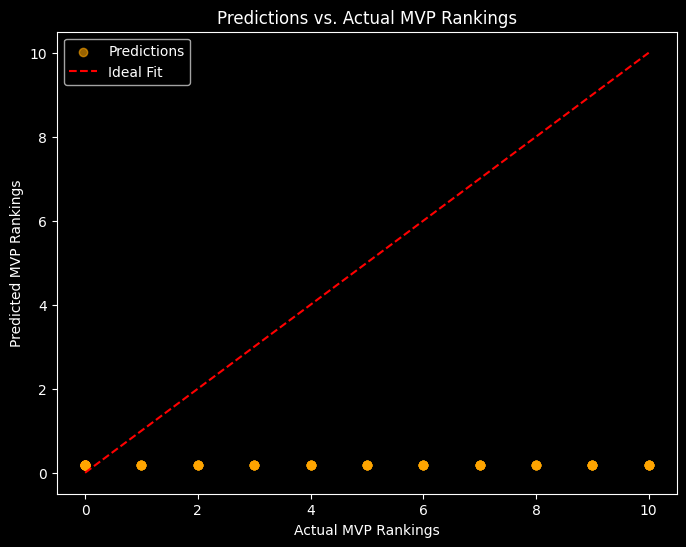

Root Mean Squared Error (RMSE): 0.9912


In [47]:
y_pred = dummy_model.predict(X_test)
# Scatter plot of predictions vs. actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='orange', label='Predictions')
plt.plot(
    [y_test.min(), y_test.max()], 
    [y_test.min(), y_test.max()], 
    color='red', linestyle='--', label='Ideal Fit'
)
plt.title('Predictions vs. Actual MVP Rankings')
plt.xlabel('Actual MVP Rankings')
plt.ylabel('Predicted MVP Rankings')
plt.legend()
plt.show()

# Performance metrics
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


In [48]:
from sklearn.ensemble import RandomForestRegressor  


# Load datasets
test_data = pd.read_csv(f"{'processed_data'}/nba_player_stats_2023-24_processed.csv")

# Prepare data
X_test = test_data[features]
y_test = test_data['MVP']

# Train the model on historical data
model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=5)
model.fit(X_train, y_train)

# Predict MVP scores for the 2023-24 season
y_pred_2023_24 = model.predict(X_test)

# Add predictions to the test data
test_data['Predicted_MVP_Score'] = y_pred_2023_24

# Rank players by predicted MVP score (1 = highest score)
test_data['MVP_Rank'] = test_data['Predicted_MVP_Score'].rank(method='min', ascending=False)

# Filter top 10 players
top_10_mvp_candidates = test_data.sort_values(by='MVP_Rank').head(10)

# Display the top 10 MVP nominees
top_10_mvp_candidates[['Player', 'Team', 'Season', 'Predicted_MVP_Score', 'MVP_Rank']]


,Player,Team,Season,Predicted_MVP_Score,MVP_Rank
0,Joel Embiid,PHI,2023-24,5.148585,1.0
47,Tyrese Haliburton,IND,2023-24,3.546655,2.0
1,Luka Dončić,DAL,2023-24,3.485681,3.0
20,DeMar DeRozan,CHI,2023-24,3.467764,4.0
18,Anthony Davis,LAL,2023-24,3.374193,5.0
19,Damian Lillard,MIL,2023-24,3.365674,6.0
24,Kawhi Leonard,LAC,2023-24,3.269172,7.0
11,Nikola Jokić,DEN,2023-24,3.170889,8.0
2,Giannis Antetokounmpo,MIL,2023-24,3.160186,9.0
8,De'Aaron Fox,SAC,2023-24,3.110397,10.0


In [51]:


# Sort by a specific column (replace 'column_name' with the column you want)
sorted_test_data = test_data.sort_values(by='MVP', ascending=False)

# Print the first 10 rows after sorting
print(sorted_test_data.head(10))

                      Player Team Multiple Teams     G    MP    FG   FGA  \
6               Kevin Durant  PHO            NaN  75.0  37.2  10.0  19.1   
57          Domantas Sabonis  SAC            NaN  82.0  35.7   7.7  13.0   
12           Anthony Edwards  MIN            NaN  79.0  35.1   9.1  19.7   
7               Jayson Tatum  BOS            NaN  74.0  35.7   9.1  19.3   
4              Jalen Brunson  NYK            NaN  77.0  35.4  10.3  21.4   
2      Giannis Antetokounmpo  MIL            NaN  73.0  35.2  11.5  18.8   
1                Luka Dončić  DAL            NaN  70.0  37.5  11.5  23.6   
3    Shai Gilgeous-Alexander  OKC            NaN  75.0  34.0  10.6  19.8   
11              Nikola Jokić  DEN            NaN  79.0  34.6  10.4  17.9   
379             Jaxson Hayes  LAL            NaN  70.0  12.5   1.8   2.5   

       FG%   3P    3P%  ...  MVP  DPOY  6MOY  ROY  AS  All-NBA  MVP_count  \
6    0.523  2.2  0.413  ...    9     0     0    0   1        2          1   
57   0.59